- Text Processing
- Frequency Distribution Plot
- Lexical Dispersion Plot
- POS Tagging and NER
- Word2Vec
- Topic Modeling with LDA
- K-Means Clustering

In our next exercise we are going to extract our own data and make our own corpus. For this exercise, let's get it from Project Gutenberg (https://www.gutenberg.org/). The Natural Language Toolkit (NLTK) suite has a lots of libraries that makes learning Natural Language Processing easy and fun. It also has small section of texts from the project gutenberg we are going to use for our purpose

In [1]:
import nltk
#from nltk.book import *
from nltk.corpus import gutenberg
words = gutenberg.words('shakespeare-hamlet.txt')  #To get the words 
sentences = gutenberg.sents('shakespeare-hamlet.txt') # Get the sentences
sample = gutenberg.raw('shakespeare-hamlet.txt')  #To get the raw text from the read file

In [2]:
#Lets see how many books are there 

# gutenberg.fileids()
# gutenberg.fileids()[-3] #We just took one of the 18 books

In [3]:
sample

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get thee to bed Francisco\n\n   Fran. For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn. Haue you had quiet Guard?\n  Fran. Not a Mouse stirring\n\n   Barn. Well, goodnight. If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.\nEnter Horatio and Marcellus.\n\n  Fran. I thinke I heare them. Stand: who's there?\n  Hor. Friends to this ground\n\n   Mar. And Leige-men to the Dane\n\n   Fran. Giue you good night\n\n   Mar. O farwel honest Soldier, who hath relieu'd you?\n  Fra. Barnardo ha's my place: giue you goodnight.\n\nExit Fran.\n\n  Mar. Holla Barnardo\n\n   Bar. 

In [4]:
# #words[:50]
# #len(words)
# sentences[:10]
# sentences[15]

In [5]:
from nltk.tokenize import sent_tokenize
tokenize = sent_tokenize (sample)
tokenize[:5]

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.',
 'Scoena Prima.',
 'Enter Barnardo and Francisco two Centinels.',
 'Barnardo.',
 "Who's there?"]

In [6]:
#Lets now check the number of paragraphs

#len(gutenberg.paras('shakespeare-hamlet.txt'))

# for para in range(10):
#     print(tokenize[para])

In next warmup exercise, we will use Lambda expression for processing text which is very powerful and easy way to do a lot of stuffs in one go. Here we do it in detail

In [7]:
sample.split(' ')[0]

'[The'

In [8]:
#Clean the text. Tokenize it. Remove unnecessary ....
import re
sample_split = []
for st in sample.strip().lower().split(' '):  ##?? why so much in one line ? What's going on ?
    st = re.sub(r"[^a-zA-Z0-9]+", '', st)  #What will this regex do ? Feel free to do extra cleaning and play with regex
        
    sample_split.append(st)
    #print(st)
sample_split

while '' in sample_split:   #The extra '\n' will be '' so we need to remove it now
    sample_split.remove('')
    
sample_split

['the',
 'tragedie',
 'of',
 'hamlet',
 'by',
 'william',
 'shakespeare',
 '1599actus',
 'primus',
 'scoena',
 'primaenter',
 'barnardo',
 'and',
 'francisco',
 'two',
 'centinels',
 'barnardo',
 'whos',
 'there',
 'fran',
 'nay',
 'answer',
 'me',
 'stand',
 'vnfoldyour',
 'selfe',
 'bar',
 'long',
 'liue',
 'the',
 'king',
 'fran',
 'barnardo',
 'bar',
 'he',
 'fran',
 'you',
 'come',
 'most',
 'carefully',
 'vpon',
 'your',
 'houre',
 'bar',
 'tis',
 'now',
 'strook',
 'twelue',
 'get',
 'thee',
 'to',
 'bed',
 'francisco',
 'fran',
 'for',
 'this',
 'releefe',
 'much',
 'thankes',
 'tis',
 'bitter',
 'coldand',
 'i',
 'am',
 'sicke',
 'at',
 'heart',
 'barn',
 'haue',
 'you',
 'had',
 'quiet',
 'guard',
 'fran',
 'not',
 'a',
 'mouse',
 'stirring',
 'barn',
 'well',
 'goodnight',
 'if',
 'you',
 'do',
 'meet',
 'horatio',
 'andmarcellus',
 'the',
 'riuals',
 'of',
 'my',
 'watch',
 'bid',
 'them',
 'make',
 'hastenter',
 'horatio',
 'and',
 'marcellus',
 'fran',
 'i',
 'thinke',
 '

In [9]:
from nltk.tokenize import word_tokenize
tokens = nltk.word_tokenize(sample)   # tokenize it
mytext = nltk.Text(tokens)         # turn text into a NLTK Text object
#mytext[:5]
type(mytext)

nltk.text.Text

In [10]:
# for word in range(10):
#     print(mytext[word])

In [11]:
#Remove stopwords now
new_sample = []
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

for word in sample_split:
    if word not in stop_words:
        new_sample.append(word)

#new_sample


In [12]:
#Now let's do Lemmatization
new_sample1 = []
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

for word in new_sample:
    new_sample1.append(wnl.lemmatize(word))
    
#new_sample1

Let's see the count of words and see the ones that occur more frequently. For that we use FreqDist

In [13]:
from nltk.probability import FreqDist

freq_dist = FreqDist(new_sample1)
print(freq_dist)

freq_dist.most_common(20)  # Understanding Shakespeare's Vocabulary set ;)

<FreqDist with 6460 samples and 15280 outcomes>


[('ham', 337),
 ('lord', 188),
 ('king', 160),
 ('haue', 159),
 ('shall', 99),
 ('come', 98),
 ('hor', 95),
 ('thou', 90),
 ('good', 89),
 ('let', 85),
 ('thy', 85),
 ('hamlet', 83),
 ('like', 70),
 ('qu', 62),
 ('know', 61),
 ('father', 61),
 ('laer', 60),
 ('ti', 59),
 ('oh', 58),
 ('well', 57)]

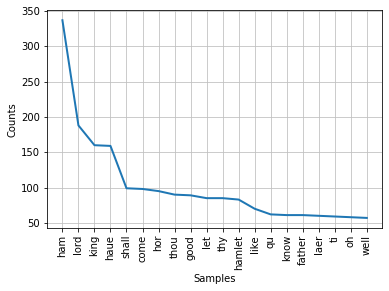

In [14]:
%matplotlib inline

# Frequency Distribution Plot
import matplotlib.pyplot as plt
freq_dist.plot(20,cumulative=False)
plt.show()


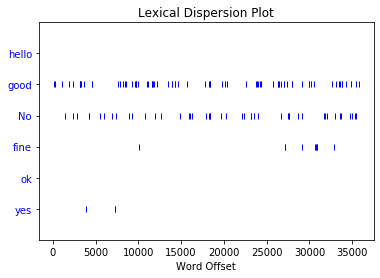

In [15]:
#Let me test my favorite words in Shakespeare's play

mytext.dispersion_plot(['hello','good','No','fine','ok','yes'])  ##Recalling mytext .... where did we assign it ?

#### POS Tagging 

In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech,based on both its definition and its context—i.e., its relationship with adjacent and related words in a phrase, sentence, or paragraph. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.
[Wikipedia]

In [16]:
#nltk.download('universal_tagset')
#Feel free to slice the mytext object. 
lst = mytext[:10]
pos_tag = nltk.pos_tag(lst,tagset = 'universal')  #Try without parameter tagset
pos_tag

[('[', 'ADP'),
 ('The', 'DET'),
 ('Tragedie', 'NOUN'),
 ('of', 'ADP'),
 ('Hamlet', 'NOUN'),
 ('by', 'ADP'),
 ('William', 'NOUN'),
 ('Shakespeare', 'NOUN'),
 ('1599', 'NUM'),
 (']', 'NOUN')]

#### Named Entity Recognition

Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entity mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. [Wikipedia]

In [17]:
from nltk import ne_chunk #Chunking adds more structure 

named_entity = nltk.ne_chunk(pos_tag)
named_entity.draw() #Magic! Something like below should appear

#Close the image that appears if you want to proceed to next cells

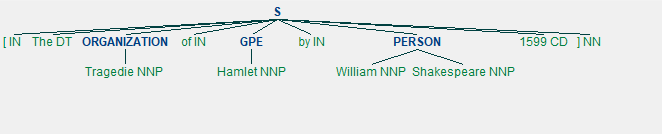

In [18]:
#Lets try to print only the names
for x in str(named_entity).split('\n'):
    if '/NN' in x:
        print(x)

We see the ] and [ also being tagged as Nouns. So Let's try with our cleaned tokenized text. GPE here stands for Geo-Political Entity

In [19]:
nltk.pos_tag(new_sample1[:10],tagset = 'universal')

[('tragedie', 'ADJ'),
 ('hamlet', 'NOUN'),
 ('william', 'NOUN'),
 ('shakespeare', 'NOUN'),
 ('1599actus', 'NUM'),
 ('primus', 'NOUN'),
 ('scoena', 'NOUN'),
 ('primaenter', 'NOUN'),
 ('barnardo', 'NOUN'),
 ('francisco', 'NOUN')]

In [20]:
#Feel free to add cells (Click the '+' sign) and do the stuffs 

#### Word2Vec

[Word2Vec](http://radimrehurek.com/gensim/models/word2vec.html) uses neural networks to analyze words in a corpus by using the contexts of words. It takes as its input a large corpus of text, and maps unique words to a vector space, such that words that share common contexts in the corpus are located in close proximity to one another in the space.
Word2Vec finds words that are used in combination with other words. So orange and juice may have a high similarity.
You can see here the context of one word (pain) for two different corpora.
This uses the popular gensim library.

In [21]:
from gensim.models import Word2Vec
hamlet_vect = Word2Vec(sentences)
blake_sentence = gutenberg.sents('blake-poems.txt')
blakes_vect = Word2Vec(blake_sentence)  #We pass corpus as input
print(hamlet_vect.wv.most_similar('thee', topn=6))
print('\n')
print(blakes_vect.wv.most_similar('thee', topn=6))

unable to import 'smart_open.gcs', disabling that module


[('it', 0.9998935461044312), ('was', 0.9998890161514282), ('well', 0.9998881816864014), ('you', 0.999886155128479), ('him', 0.9998831748962402), ('selfe', 0.9998830556869507)]


[(',', 0.9995841979980469), ('the', 0.9995209574699402), ('a', 0.9995146989822388), ('and', 0.999514102935791), ('s', 0.9995118975639343), ("'", 0.9995089173316956)]


In [22]:
#So why do we need to vectorize the words then ?

#### Topic Modeling

Latent Dirichlet Allocation (LDA) is unsupervised learning method that uses probabilistic model to identify group of topics. IT discovers abstract topics that occur in a collection of documents. (We can explore its inner workings in our project word)

In [23]:
#Corpus is simply collection of documents and each document is a collection of words
corpus = blake_sentence[5:15] #Feel free to slice the tokenized sentences
corpus

[['"', 'Pipe', 'a', 'song', 'about', 'a', 'Lamb', '!"'],
 ['So', 'I', 'piped', 'with', 'merry', 'cheer', '.'],
 ['"',
  'Piper',
  ',',
  'pipe',
  'that',
  'song',
  'again',
  ';"',
  'So',
  'I',
  'piped',
  ':',
  'he',
  'wept',
  'to',
  'hear',
  '.'],
 ['"',
  'Drop',
  'thy',
  'pipe',
  ',',
  'thy',
  'happy',
  'pipe',
  ';',
  'Sing',
  'thy',
  'songs',
  'of',
  'happy',
  'cheer',
  ':!"'],
 ['So',
  'I',
  'sang',
  'the',
  'same',
  'again',
  ',',
  'While',
  'he',
  'wept',
  'with',
  'joy',
  'to',
  'hear',
  '.'],
 ['"',
  'Piper',
  ',',
  'sit',
  'thee',
  'down',
  'and',
  'write',
  'In',
  'a',
  'book',
  ',',
  'that',
  'all',
  'may',
  'read',
  '."'],
 ['So',
  'he',
  'vanish',
  "'",
  'd',
  'from',
  'my',
  'sight',
  ';',
  'And',
  'I',
  'pluck',
  "'",
  'd',
  'a',
  'hollow',
  'reed',
  ','],
 ['And',
  'I',
  'made',
  'a',
  'rural',
  'pen',
  ',',
  'And',
  'I',
  'stain',
  "'",
  'd',
  'the',
  'water',
  'clear',
  ',',
  'A

Let's convert the corpus into a matrix representation. 
First of all we have to create term dictionary of the corpus. Then we convert the dictionary into document-term matrix.  

In [24]:
import gensim
from gensim import corpora # Corpora is plural of corpus


dictionary = corpora.Dictionary(corpus)
#print(dictionary)

# Bag-of-words or bow tells you what words occur in the document
DocTerm_matrix = [dictionary.doc2bow(doc) for doc in corpus]

Lda_object = gensim.models.ldamodel.LdaModel

In [25]:
lda_model_1 = Lda_object(DocTerm_matrix, num_topics=2, id2word = dictionary)


In [26]:
print(lda_model_1.print_topics(num_topics=2, num_words=5))


[(0, '0.038*"," + 0.037*"I" + 0.036*"And" + 0.036*"a" + 0.028*"happy"'), (1, '0.044*"," + 0.037*"I" + 0.034*"So" + 0.028*"." + 0.027*"\'"')]


Lets convert list into string so that we can do preprocessing with it

In [27]:
#Takes a list s and keeps joining every word in them
def listToString(s):  
    
    # initialize an empty string 
    str1 = " "  

    # return string   
    return str1.join(s)  

In [28]:
listToString(corpus[0])

'" Pipe a song about a Lamb !"'

Looks stupid. Lets try after preprocessing the corpus

In [29]:
import string
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
no_punct = set(string.punctuation)
lemma_obj = WordNetLemmatizer()

def preprocess(document):
    #Each document is a list. We need to convert it to string before we can run any string functions on them.
    no_stopwords = " ".join([i for i in listToString(document).lower().split() if i not in stopwords])
    no_punctuation = ''.join(ch for ch in no_stopwords if ch not in no_punct)
    lemmatized = " ".join(lemma_obj.lemmatize(word) for word in no_punctuation.split())
    return lemmatized

final_corpus = [preprocess(document).split() for document in corpus]

In [30]:
dictionary = corpora.Dictionary(final_corpus)

DocTerm_matrix = [dictionary.doc2bow(doc) for doc in corpus]

Lda_object = gensim.models.ldamodel.LdaModel

lda_model_2 = Lda_object(DocTerm_matrix, num_topics=2, id2word = dictionary)

In [31]:
print(lda_model_2.print_topics(num_topics=2, num_words=5))


[(0, '0.062*"hear" + 0.046*"song" + 0.045*"may" + 0.044*"wept" + 0.043*"joy"'), (1, '0.080*"thy" + 0.068*"happy" + 0.065*"pipe" + 0.056*"sweet" + 0.051*"cheer"')]


Very poetic! As an assignment let's try with some other text books in gutenberg

#### K-Means Clustering 

In our final project, we are going project related to clustering. So lets know the basics of k-means clustering.

Following article explains very well the concept behind K-means clustering:

https://medium.com/@april.griffin091/a-beginners-overview-of-the-k-means-clustering-algorithm-382b1efd11c3

Lets not bother about scaling our data. We try with a small sample 

In [32]:
import numpy as np
from nltk.cluster import KMeansClusterer, euclidean_distance 
''' see the documentation of euclidean_distance: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html'''

'''Also see this page how they have done the clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html''' 
#But we continue with nltk.cluster's KMeansClusterer (You might google it and see the documentation)

#Suppose we have 6 different points and we want to cluster it to two groups. For that we assign two centroids

#We can make a numpy array to represent the points. It is easy to iterate through numpy arrays

np_arr = [np.array(points) for points in [[1,1],[0,1],[1,3],[0,4],[2,4],[0,3]]]
#We assign the center of first cluster to be (1,2) and that of second to be (3,3)
#Next, each point is compared with both the centroid and is assigned to the closest center
centroid = [[1,2],[3,3]] 
#lets cluster to 2 clusters with centroid defined above using euclidean distance as a metric
cluster_obj = KMeansClusterer(2, euclidean_distance, initial_means = centroid) #Initial means is a set of k initial means which is sequence of vectors

clusters = cluster_obj.cluster(np_arr, assign_clusters = True, trace=True) #Assigns the vectors to clusters, learning the clustering parameters from the data. Returns a cluster identifier for each vector.

print('Cluster Points:',np_arr)
print('In Clusters:',clusters)
print('Means:',cluster_obj.means())
          

k-means trial 0
iteration
iteration
Cluster Points: [array([1, 1]), array([0, 1]), array([1, 3]), array([0, 4]), array([2, 4]), array([0, 3])]
In Clusters: [0, 0, 0, 0, 1, 0]
Means: [array([0.4, 2.4]), array([2., 4.])]


Except point (2,4), all other points in 0 cluster. The center of cluster0 is (0.4, 2.4) and that of second cluster is the point itself ( why ?)

Lets see it in plot to see how it has done clustering

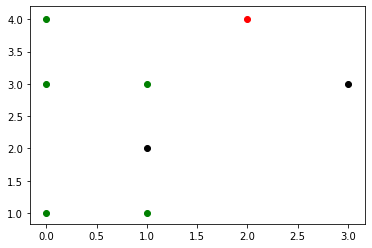

In [33]:
import matplotlib.pyplot as plt

# Detailed instructions on plots can be found of pythonbasics notebook
x0 = np.array([item[0] for index, item in enumerate (np_arr) if clusters[index]==0])
y0 = np.array([item[1] for index, item in enumerate (np_arr) if clusters[index]==0])
plt.scatter(x0,y0,color = 'green')

x1 = np.array([item[0] for index, item in enumerate (np_arr) if clusters[index]==1])
y1 = np.array([item[1] for index, item in enumerate (np_arr) if clusters[index]==1])
plt.scatter(x1,y1, color='red')

xc = np.array([x[0] for x in centroid])
yc = np.array([x[1] for x in centroid])
plt.scatter(xc,yc, color='black')   #Does it give you the points (1,2) and (3,3) ?
plt.show()



So lets try it with 5 repetetions.

We try with random seeds above and get different results in each run.

In [34]:
# test k-means using 2 means, euclidean distance, and 5 repetitions 
# np.random.seed(123)  #See what happens when we set this seed (Now what is this seed which does not germinate ? )
cluster_obj = KMeansClusterer(2, euclidean_distance, repeats=5 ) # Make repead = 10 and see what happens
clusters = cluster_obj.cluster(np_arr, True)
#The cluster center keeps moving in each iteration . (But why ?)
centroids = cluster_obj.means()  #Calculated means which is [0.5, 1] and [0.75, 3.5 ]
#print(centroids)
print('Clustered Objects:', np_arr)
print('In Clusters:', clusters)
print('Means:', centroids)

# classify a new vector
vector = np.array([2,2])
print('classify(%s):' % vector, end=' ')
print(cluster_obj.classify(vector)) # Lets see the result of which cluster does this belong to

Clustered Objects: [array([1, 1]), array([0, 1]), array([1, 3]), array([0, 4]), array([2, 4]), array([0, 3])]
In Clusters: [0, 0, 0, 0, 1, 0]
Means: [array([0.4, 2.4]), array([2., 4.])]
classify([2 2]): 0


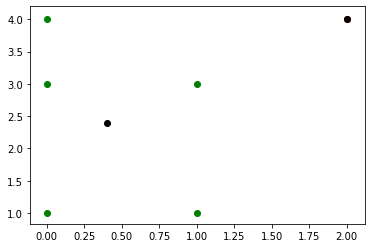

In [36]:
import matplotlib.pyplot as plt

x0 = np.array([item[0] for index, item in enumerate (np_arr) if clusters[index]==0])
y0 = np.array([item[1] for index, item in enumerate (np_arr) if clusters[index]==0])
plt.scatter(x0,y0,color = 'green')

x1 = np.array([item[0] for index, item in enumerate (np_arr) if clusters[index]==1])
y1 = np.array([item[1] for index, item in enumerate (np_arr) if clusters[index]==1])
plt.scatter(x1,y1, color='red')

xc = np.array([x[0] for x in centroids])
yc = np.array([x[1] for x in centroids])
plt.scatter(xc,yc, color='black')
plt.show()
#Note, if you find that there is only one point in one of the clusters then it would be the centroid itself and might be overlapped with black dot

If it still does not satisfy you try adding two more points to np_arr, change some of the points and see how it goes